In [85]:
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

df_amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
df_amazon.columns = ['message', 'score'] # score of 1=positive, 0=negative

df_imdb = pd.read_csv('imdb_labelled.txt', delimiter='\t', names=['message', 'score'])

df_yelp = pd.read_csv('yelp_labelled.txt', delimiter='\t', names=['message', 'score'])


We are trying to use a Naive Bayes seniment classifier to predict whether or not a comment on a website is positive or negative.  To start we will create a list of keywords to search for in the comments to classify by.  The keywords should all correspond to a positive comment.

In [86]:
keywords = ['good', 'great', 'best', 'excellent', 'awesome', 'fantastic', 'would recommend', 
            'must have', 'amazing', 'highly recommend', 'love', 'happy', 'glad', 'satisfied', 'perfect']

def naive_bayes_classifier(df):
    for key in keywords:
        df[str(key)]=df.message.str.contains(str(key), case=False)
    data = df[keywords]
    target = df['score']
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)

    print('Number of mislabelled points out of total {}: {}'.format(df.shape[0], (target!=y_pred).sum()))
    print('Performance = {:05.2f}%'.format(100*(1-(target!=y_pred).sum()/df.shape[0])))
    sns.heatmap(df.corr())
    plt.show

For my feature selection I chose a method that selected keywords from the comments.  I elected not to add a space around the keywords for this to capture the words at the beginning of the comment and any keywords that were attached to punctuation.  My thought process here was selecting positive adjectives that would be used in a positive review.  The amazon dataset was the first one I built the model for.

The CORR MATRIX for each dataset can be seen with the with number of mislabelled points out of the total and the performance of the model.  For the amazon dataset and the yelp dataset, the feature choices work well.  For the IMDB dataset we what appears to be some issue with 'would recommend' and 'satisfied'.

Number of mislabeled points out of total 1000: 265
Performance = 73.50%


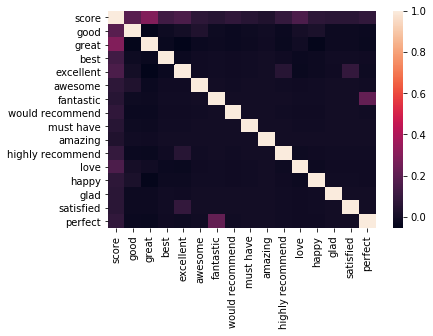

In [87]:
naive_bayes_classifier(df_amazon)

Number of mislabeled points out of total 748: 299
Performance = 60.03%


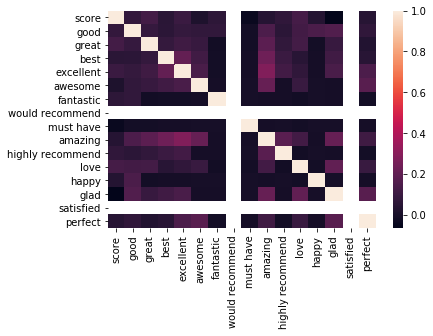

In [88]:
naive_bayes_classifier(df_imdb)

Number of mislabeled points out of total 1000: 290
Performance = 71.00%


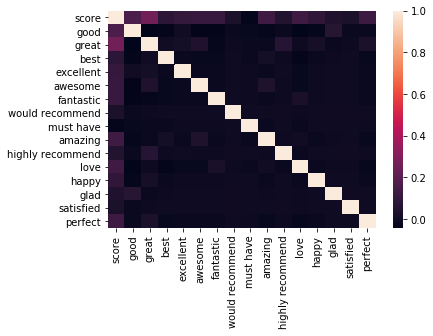

In [89]:
naive_bayes_classifier(df_yelp)